<a href="https://colab.research.google.com/github/yingch08/House-Price-Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **House price prediction project**

Cleaning data, building Multiple Linear Regression model to conduct simple analysis, and visualization my findings.

### **1. Read data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io
data = files.upload()

Saving HW1_house_price_regression.csv to HW1_house_price_regression.csv


In [ ]:
df_house = pd.read_csv(io.StringIO(data['HW1_house_price_regression.csv'].decode('utf-8')))

### **2. Preprocess data**

In [ ]:
# Check missing values
pd.set_option("display.max_rows", None, "display.max_columns", None)
df_house.isna().sum() 

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [ ]:
# Drop redundant/missing-values columns
df1 = df_house.drop(['Id','LotFrontage','GarageYrBlt'], axis=1)
# Drop rows containing NAs
df1 = df1.dropna(subset = ['Electrical','MasVnrType','MasVnrArea'])
# LotFrontage, MasVnrType, MasVnrArea, Electrical, garage

In [ ]:
# Check the numbers of column/row after processed missing values
print(df_house.shape)
print(df1.shape)

(1460, 81)
(1451, 78)


In [ ]:
# Check all columns' data types
df1.dtypes

MSSubClass         int64
MSZoning          object
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object
CentralAir        object


In [ ]:
# Transform categorical features into dummy variables
df1_obj = df1.select_dtypes(include=['object']).copy()
df1_obj.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
df1_dummy = pd.get_dummies(df1_obj, drop_first=1, dtype='int64')

In [ ]:
print(df1_obj.shape)
print(df1_dummy.shape)

(1451, 43)
(1451, 209)


In [ ]:
# Get all numeric columns
df1_numeric = df1.select_dtypes(include=['int64']).copy() # deleted type 'float64'
df1_numeric.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,Bedroom,Kitchen,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
# Concat data_dummy and data_numeric into 'df2'
df2 = pd.concat([df1_dummy, df1_numeric], axis=1)
print(df2.shape)

(1451, 243)


### **3. Split x/y, Training/Test set**

In [ ]:
# Split features(x) and target(y)
x = df2.iloc[:,0:242].values
y = df2.iloc[:,242].values
print('x: ', x.shape)
print('y: ', y.shape)

x:  (1451, 242)
y:  (1451,)


In [ ]:
# Split training/test set
from sklearn.model_selection import train_test_split
x_train,x_valid, y_train, y_valid = train_test_split(x,y,test_size=0.3,random_state=0)
print('x_train: ', x_train.shape)
print('x_valid: ', x_valid.shape)
print('y_train: ', y_train.shape)
print('y_valid: ', y_valid.shape)

x_train:  (1015, 242)
x_valid:  (436, 242)
y_train:  (1015,)
y_valid:  (436,)


### **4. Fit Multiple Linear Regression model**

In [ ]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

### **5. Report model performance metrics**

In [ ]:
# R2
print('R2 for training set = %.5f' % mlr.score(x_train, y_train))
print('R2 for validation set = %.5f' % mlr.score(x_valid, y_valid))

R2 for training set = 0.94430
R2 for validation set = 0.59537


In [ ]:
# create pred_x, pred_y
pred_train = pd.DataFrame({'predict_train': pd.Series(mlr.predict(x_train))})
pred_valid = pd.DataFrame({'predict_valid': pd.Series(mlr.predict(x_valid))})

In [ ]:
# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_train = sqrt(mean_squared_error(y_train, pred_train))
rmse_valid = sqrt(mean_squared_error(y_valid, pred_valid))
print('RMSE for training set = %.2f' % rmse_train)
print('RMSE for validation set = %.2f' % rmse_valid)

RMSE for training set = 18889.99
RMSE for validation set = 49301.41


### **6. Visualization (Seaborn)**

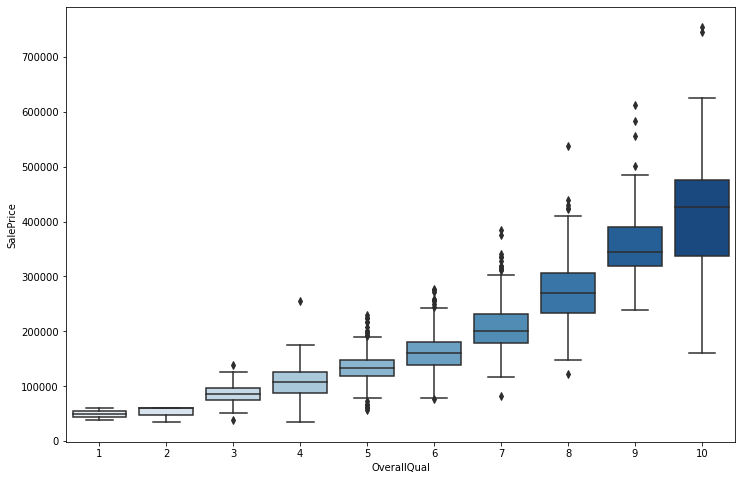

In [ ]:
# Boxplot of OverallQual and SalePrice
plt.figure(figsize=(12,8))
sns.boxplot(x='OverallQual', y='SalePrice',data=df2, palette='Blues')